##Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
##Perform following tasks:
##1. Pre-process the dataset.
##2. Identify outliers.
##3. Check the correlation.
##4. Implement linear regression and random forest regression models.
##5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
##Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [14]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#importing the dataset
df = pd.read_csv("C:\\Users\\Owner\\Desktop\\Machine Learning BE\\Practical\\Practical Data Sets\\uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## 1)Pre-process the dataset

In [16]:

df.info() #To get the required information of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [17]:
df.columns #TO get number of columns in the dataset


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required


In [19]:
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
df.shape #To get the total (Rows,Columns)


(200000, 7)

In [21]:
df.dtypes #To get the type of each column


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [23]:
df.describe() #To get statistics of each columns

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [24]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [26]:
df.isnull().sum().sum()

2

# 2)Filling Missing values

In [27]:
df.isnull().sum()
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)
df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## 3) Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [28]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [29]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce',utc=True)

#df.pickup_datetime = pd.to_datetime(df.pickup_datetime)



In [30]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

# 4)To segregate each time of date and time


In [31]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [32]:
df= df.assign(hour = df.pickup_datetime.dt.hour,day= df.pickup_datetime.dt.day,month = df.pickup_datetime.dt.month,year = df.pickup_datetime.dt.year,dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [33]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column
df = df.drop(['pickup_datetime'], axis=1)

In [34]:
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [35]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [36]:
number_of_columns = len(df.columns)


In [37]:
number_of_columns

11

In [26]:
#Distance Calculation
!pip install haversine
import haversine as hs #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
 long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
 loc1=(lati1,long1)
 loc2=(lati2,long2)
 c = hs.haversine(loc1,loc2)
 travel_dist.append(c)
 
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

ValueError: Longitude -748.016667 is out of range [-180, 180]

In [38]:
 #function to calculate the travel distance from the longitudes and latitudes
from math import *
    
def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2
        
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
            
    return  travel_dist


In [39]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

# 5) Checking outliers and filling them


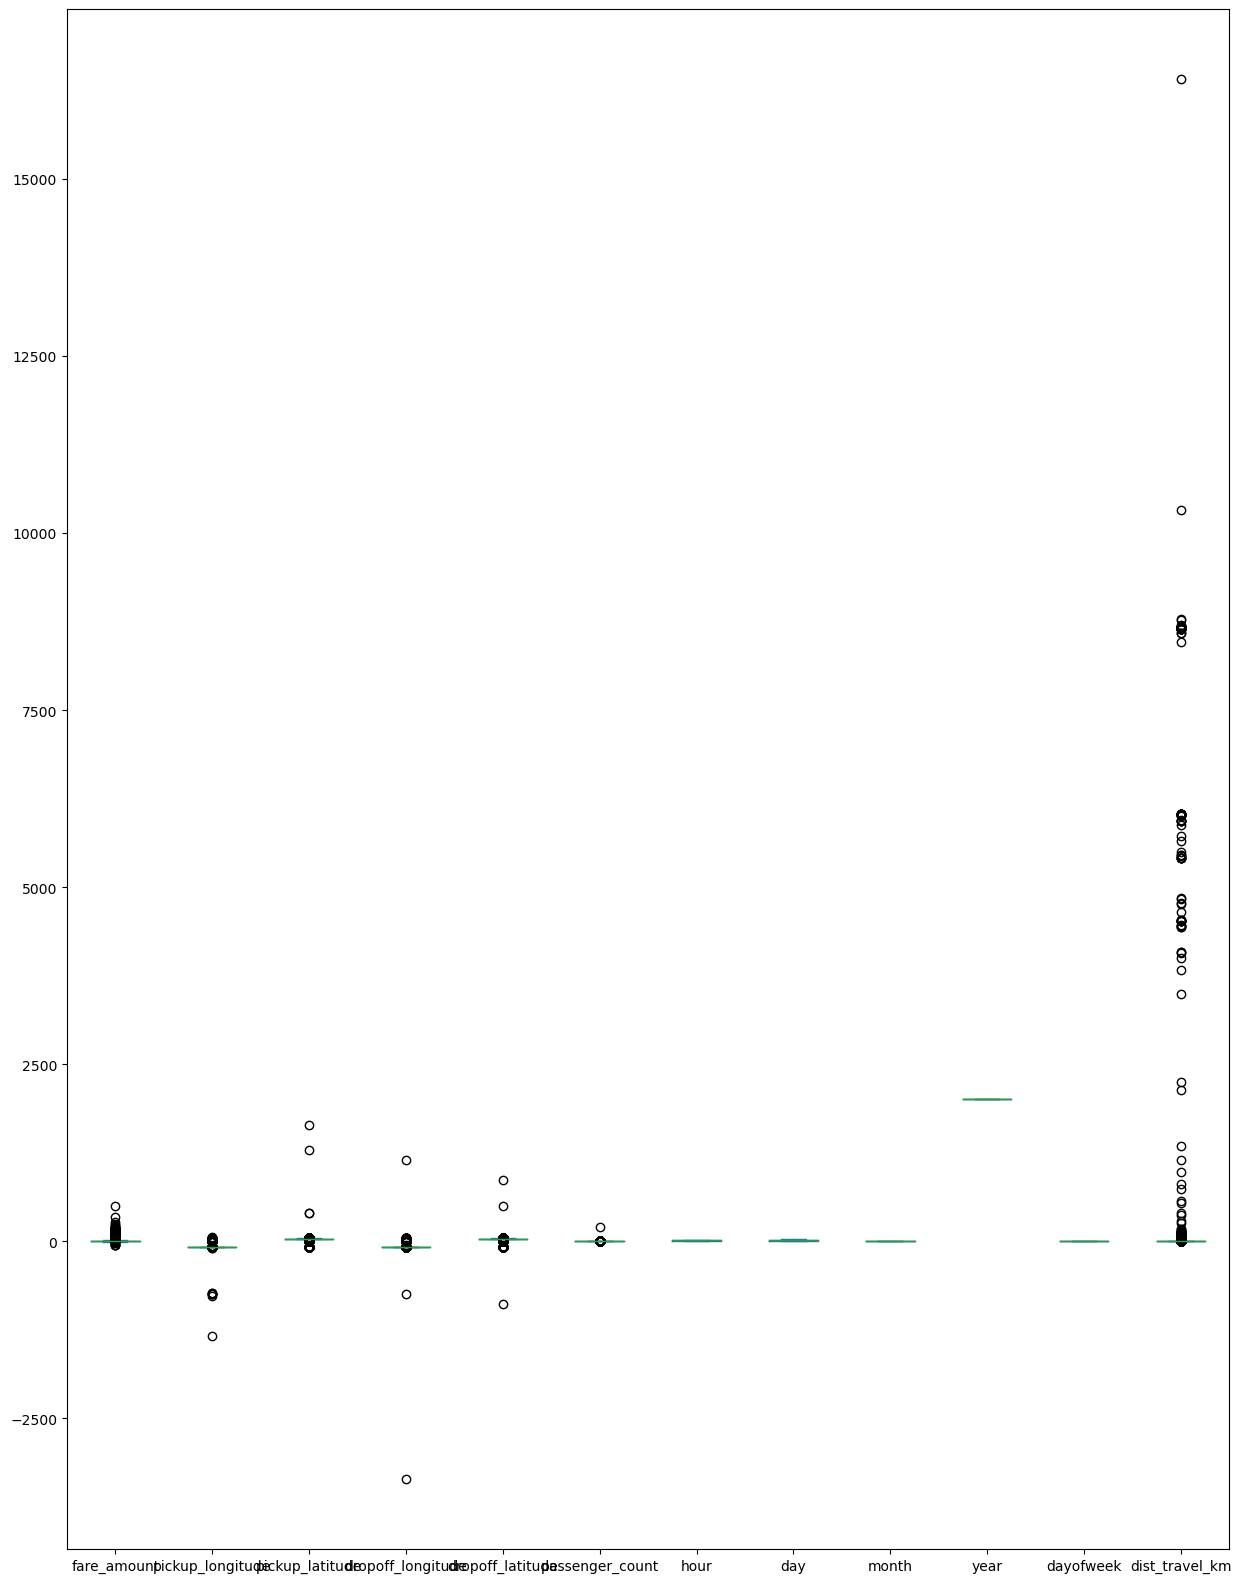

In [40]:
df.plot(kind = "box",subplots = False,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

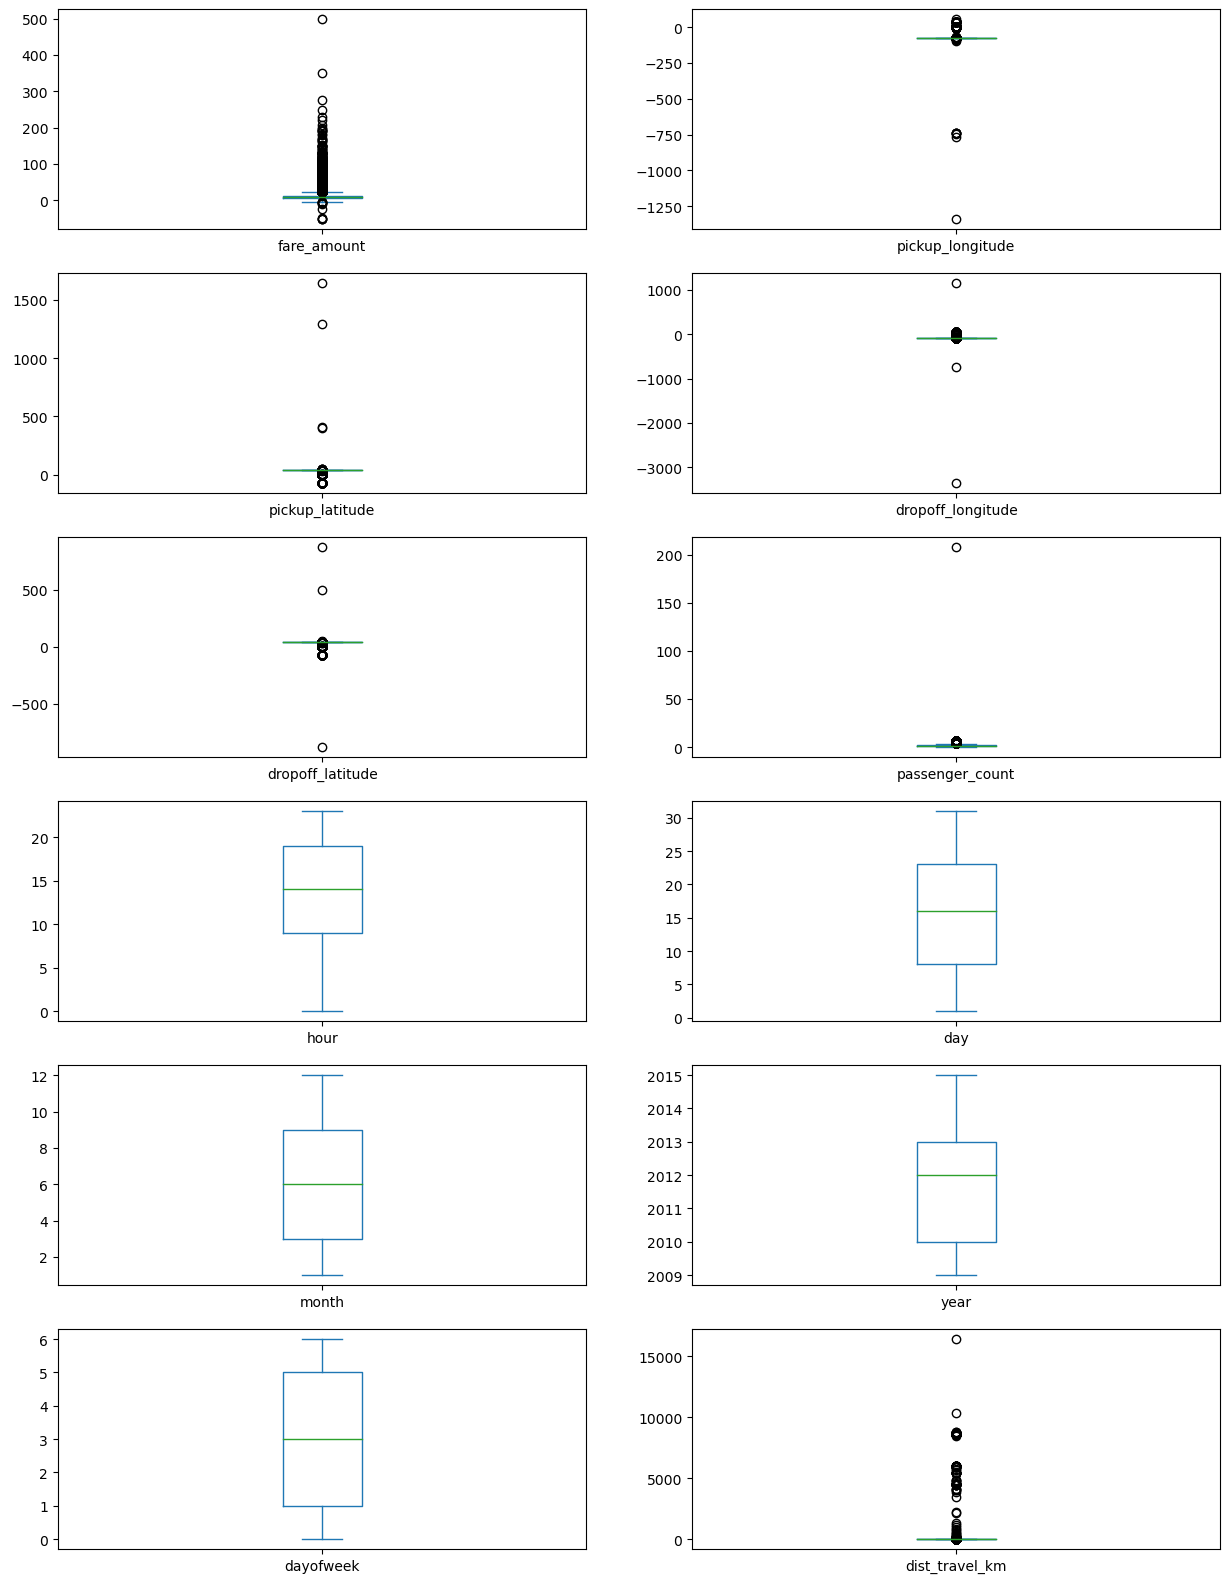

In [41]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

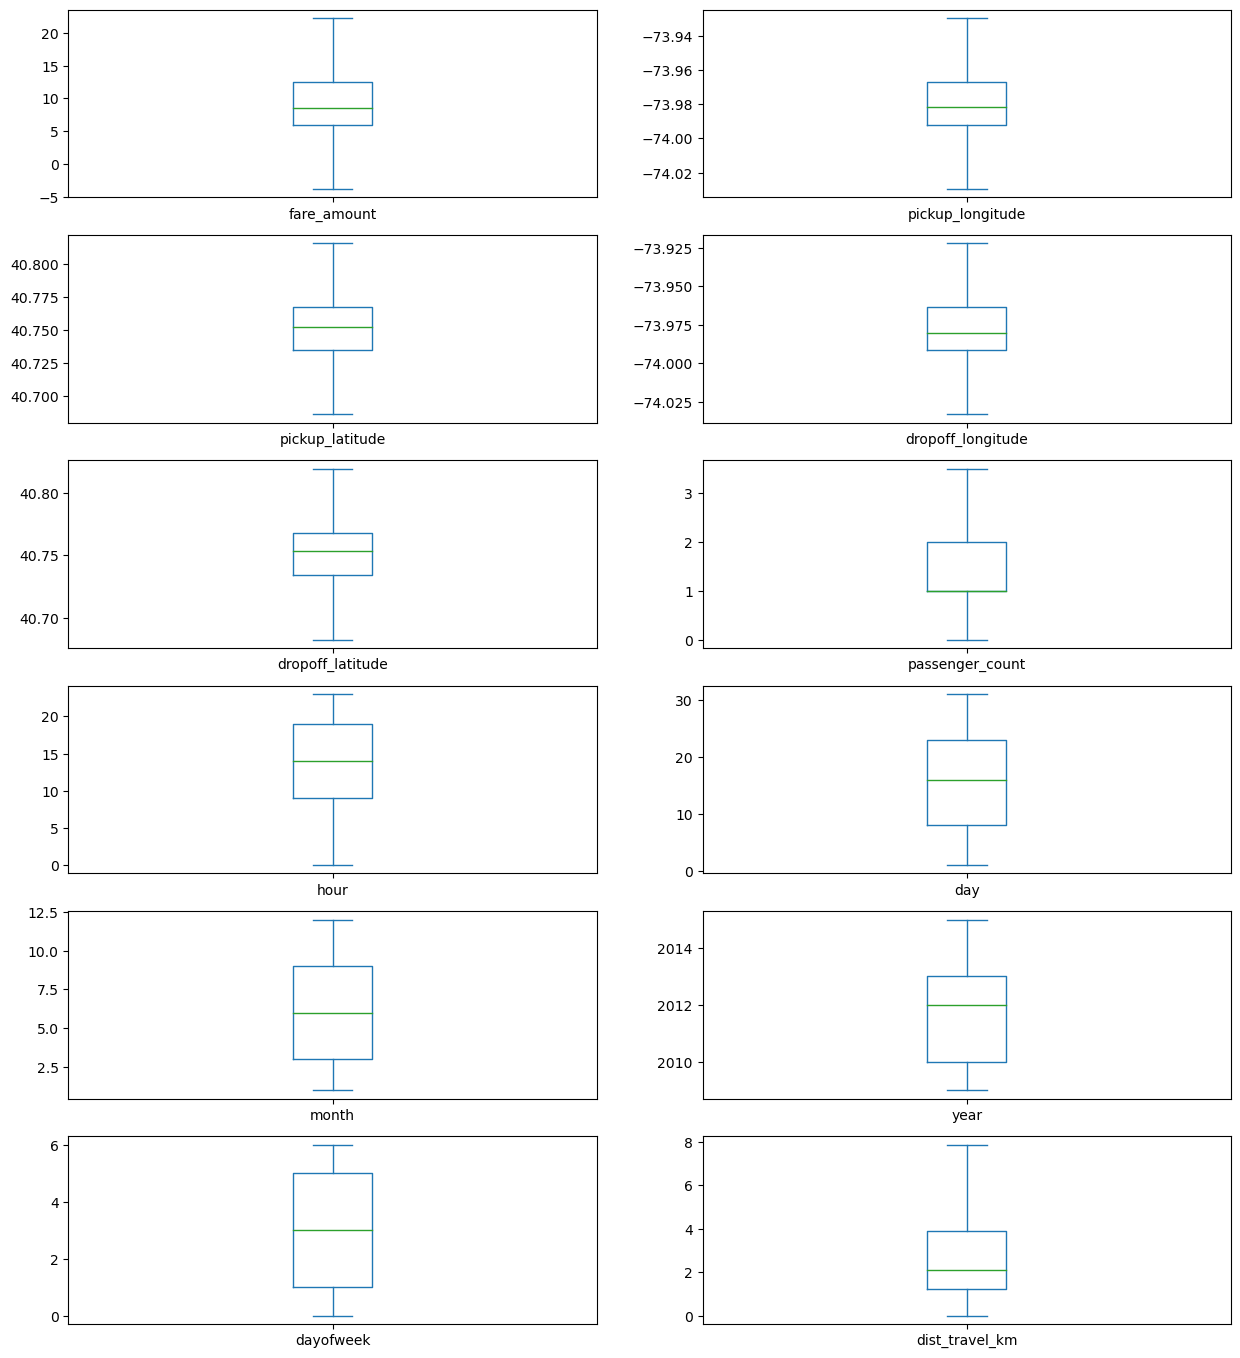

In [42]:
def remove_outlier(df1 , col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1-1.5*IQR
  upper_whisker = Q3+1.5*IQR
  df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
  return df1
def treat_outliers_all(df1 , col_list):
      for c in col_list:
         df1 = remove_outlier(df , c)
      return df1
df = treat_outliers_all(df , df.columns)
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

<Axes: >

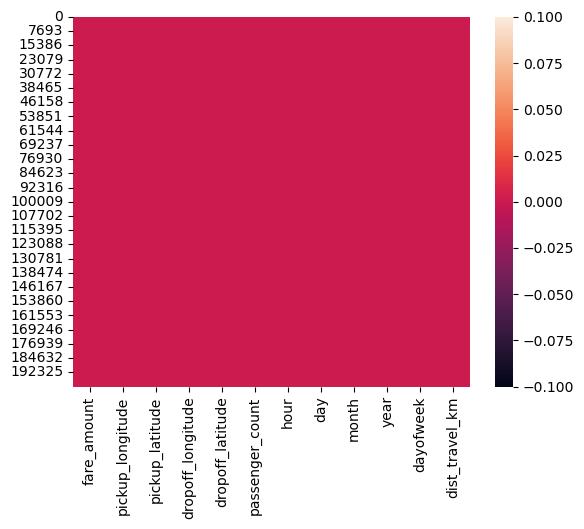

In [84]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater thanor less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude <-180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude <-90) ]
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df.head()
df.isnull().sum()
sns.heatmap(df.isnull()) #Free for null values



In [85]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km


In [43]:
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


# 7)Check the correlation.


In [44]:

#Function to find the correlation
corr = df.corr() 
corr


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278


<Axes: >

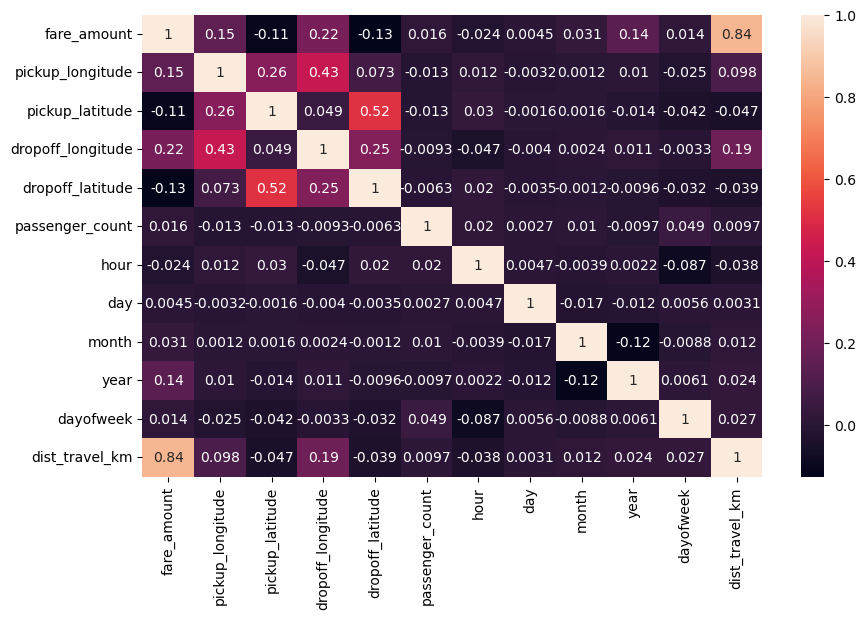

In [45]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

# 6)Dividing the dataset into feature and target value


In [46]:
df.columns


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

In [47]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dist_travel_km       float64
dtype: object

In [48]:
x = df[['hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

# 7) Scaling and Dividing the dataset into training and testing dataset


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25)

In [51]:
X_train

array([[ 0.84546886, -1.69264582,  1.66279263, -0.39993699, -0.02487235,
         0.79594286],
       [ 1.15242848, -1.11709879, -0.37273223,  1.21610063, -1.05212474,
         2.25341213],
       [ 1.15242848,  0.49443288, -0.37273223,  1.21610063, -1.05212474,
        -0.08697451],
       ...,
       [-2.07064754,  1.18508931, -0.66352149, -1.4772954 ,  1.51600624,
         0.5753677 ],
       [ 0.84546886, -0.31133296, -0.66352149, -0.9386162 , -1.05212474,
        -0.58008816],
       [-0.53584944,  0.03399526,  1.66279263, -0.9386162 , -0.02487235,
        -0.74199512]])

In [52]:
y_train

78844     12.50
118260    20.50
61381      8.50
12228     22.25
155654     6.10
          ...  
18432      6.90
171430     8.10
30005     14.90
181136     4.50
11143      9.70
Name: fare_amount, Length: 150000, dtype: float64

In [53]:
len(y)

200000

In [54]:
len(y_train)

150000

In [55]:
len(y_test)

50000

# 8)Linear Regression

In [56]:

from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [57]:
regression.fit(X_train,y_train)


LinearRegression()

In [58]:
regression.coef_ #To find the linear coeeficient


array([ 0.04337828,  0.01788022,  0.19242306,  0.6820948 , -0.04621405,
        4.58770233])

In [59]:
regression.intercept_ #To find the linear intercept


10.080789784635625

In [60]:
for i in range(0,len(regression.coef_)):
    print("Theta",i,"=",regression.coef_[i])



Theta 0 = 0.04337827541522934
Theta 1 = 0.017880221730170127
Theta 2 = 0.1924230571993695
Theta 3 = 0.6820948013914162
Theta 4 = -0.046214047078396284
Theta 5 = 4.587702328900592


In [61]:
y_prediction = regression.predict(X_test) #To predict the target values
print(y_prediction)

[ 8.80514899  8.36382421  8.40862543 ...  9.41556042 14.27137731
  6.60589352]


In [62]:
y_test

76442      7.7
38632      7.3
126672     6.9
57454     12.0
77644      6.9
          ... 
88123      6.5
86583      7.0
83289     12.9
34937     13.7
31943      3.5
Name: fare_amount, Length: 50000, dtype: float64

In [63]:
comparison=pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_prediction })

In [64]:
comparison

,Actual Value,Predicted Value
76442,7.7,8.805149
38632,7.3,8.363824
126672,6.9,8.408625
57454,12.0,12.675155
77644,6.9,8.321669
...,...,...
88123,6.5,8.229326
86583,7.0,5.856374
83289,12.9,9.415560
34937,13.7,14.271377


In [65]:
comparison.reset_index()

,index,Actual Value,Predicted Value
0,76442,7.7,8.805149
1,38632,7.3,8.363824
2,126672,6.9,8.408625
3,57454,12.0,12.675155
4,77644,6.9,8.321669
...,...,...,...
49995,88123,6.5,8.229326
49996,86583,7.0,5.856374
49997,83289,12.9,9.415560
49998,34937,13.7,14.271377


In [66]:
comparison.reset_index().drop(["index"],axis=1)

,Actual Value,Predicted Value
0,7.7,8.805149
1,7.3,8.363824
2,6.9,8.408625
3,12.0,12.675155
4,6.9,8.321669
...,...,...
49995,6.5,8.229326
49996,7.0,5.856374
49997,12.9,9.415560
49998,13.7,14.271377


<Axes: >

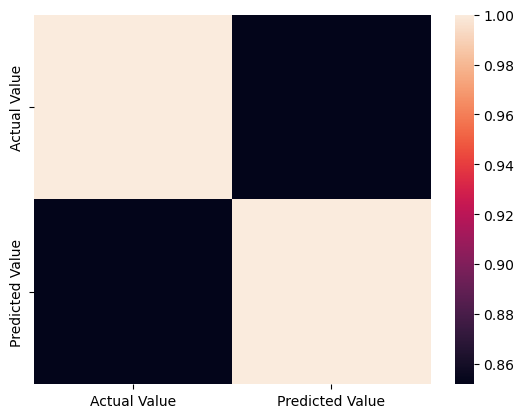

In [67]:
sns.heatmap(comparison.corr())

# 9)Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error


In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)



0.7254963990736691

In [69]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_prediction)
MSE

8.017595817049719

In [70]:
RMSE = np.sqrt(MSE)
RMSE

2.831535946628564

# 10)Random Forest Regression


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred



array([ 9.708,  8.552,  8.668, ...,  9.29 , 12.231,  5.485])

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.7254963990736691

In [73]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_prediction)
MS                E

8.017595817049719

In [74]:
RMSE = np.sqrt(MSE)
RMSE

2.831535946628564